In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pengumpulan Data
df = pd.read_csv('/content/reviewHotelJakarta.csv')
df.head()

,Hotel_name,name,rating,review
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h..."
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...


In [28]:
# 2. Pra-pemrosesan Teks
# Contoh pra-pemrosesan sederhana
df['lemmatized_review'] = df['review'].str.lower()  # Mengubah ke huruf kecil
df['lemmatized_review'] = df['lemmatized_review'].str.replace('[^\w\s]', '')  # Menghapus tanda baca

In [29]:
df.head()

,Hotel_name,name,rating,review,lemmatized_review
0,Hotel Gran Mahakam,Robert Gow,4.0,Old boutique hotel but very well maintained. R...,old boutique hotel but very well maintained. r...
1,Hotel Gran Mahakam,Oggi Gunadi,5.0,Outstanding service from the first sight. Firs...,outstanding service from the first sight. firs...
2,Hotel Gran Mahakam,Fifi Muliadi,5.0,"When I was working, I frequently visited the h...","when i was working, i frequently visited the h..."
3,Hotel Gran Mahakam,Renatha P,5.0,Having all you can eat luncheon in private roo...,having all you can eat luncheon in private roo...
4,Hotel Gran Mahakam,Swathi V,5.0,My stay was a combination of quarantine and no...,my stay was a combination of quarantine and no...


In [30]:
import string
import re

In [31]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [32]:
# 3. Representasi Teks
# Menggunakan BoW
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['lemmatized_review'])
y = df['label']

# Menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

In [33]:
# 4. Pembagian Data
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [34]:
# 5. Model Klasifikasi
# Naive Bayes dengan BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)

# Naive Bayes dengan TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB()

In [35]:
# 6. Evaluasi Model
y_pred_bow = nb_bow.predict(X_test_bow)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Accuracy with BoW:", accuracy_score(y_test, y_pred_bow))
print("Classification Report with BoW:\n", classification_report(y_test, y_pred_bow))

print("Accuracy with TF-IDF:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Classification Report with TF-IDF:\n", classification_report(y_test_tfidf, y_pred_tfidf))

Accuracy with BoW: 0.8571428571428571
Classification Report with BoW:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.88      0.94      0.91        47

    accuracy                           0.86        63
   macro avg       0.82      0.78      0.80        63
weighted avg       0.85      0.86      0.85        63

Accuracy with TF-IDF: 0.746031746031746
Classification Report with TF-IDF:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.75      1.00      0.85        47

    accuracy                           0.75        63
   macro avg       0.37      0.50      0.43        63
weighted avg       0.56      0.75      0.64        63



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


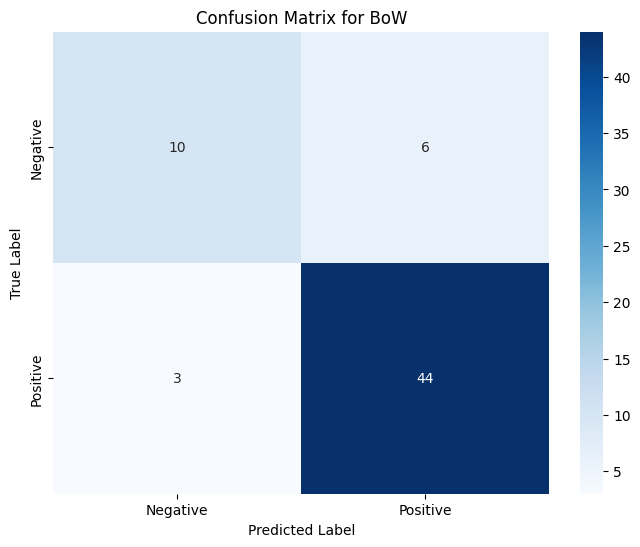

In [36]:
# Confusion Matrix for BoW
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for BoW')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

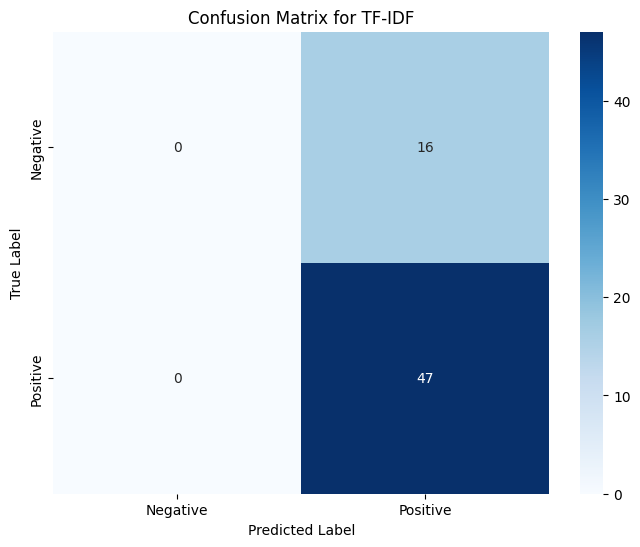

In [37]:
# Confusion Matrix for TF-IDF
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for TF-IDF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
# 7. Prediksi
data = ["This app is great!", "I had a terrible experience."]
bow_vect = bow_vectorizer.transform(data)
tfidf_vect = tfidf_vectorizer.transform(data)

pred_bow = nb_bow.predict(bow_vect)
pred_tfidf = nb_tfidf.predict(tfidf_vect)

print("Predictions with BoW:", pred_bow)
print("Predictions with TF-IDF:", pred_tfidf)

Predictions with BoW: [1 0]
Predictions with TF-IDF: [1 1]
